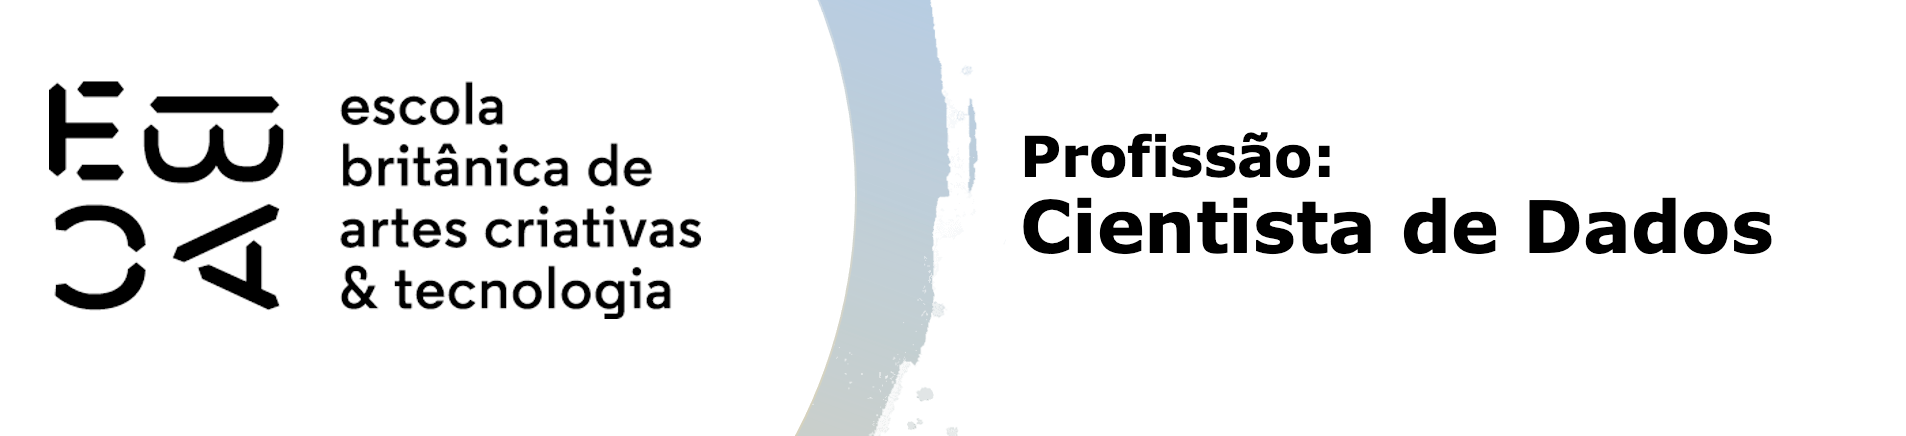

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [5]:
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# 1 Análise Descritiva das Variáveis de Navegação

Esta análise foca nas seis primeiras variáveis do dataset `online_shoppers_intention.csv`, que representam a quantidade e a duração dos acessos a diferentes tipos de páginas.

## 1.2 Variáveis Analisadas

1. **Administrative**: Número de acessos a páginas administrativas.
2. **Administrative_Duration**: Tempo total gasto em páginas administrativas (em segundos).
3. **Informational**: Número de acessos a páginas informativas.
4. **Informational_Duration**: Tempo total gasto em páginas informativas (em segundos).
5. **ProductRelated**: Número de acessos a páginas de produtos.
6. **ProductRelated_Duration**: Tempo total gasto em páginas de produtos (em segundos).

## 1.3 Estatísticas Descritivas

| Variável                 | Média | Mediana | Desvio Padrão | Mínimo | Máximo |
|--------------------------|-------|---------|---------------|--------|--------|
| Administrative           | 2,32  | 1       | 3,32          | 0      | 27     |
| Administrative_Duration  | 80,91 | 0       | 176,54        | 0      | 3398   |
| Informational            | 0,50  | 0       | 1,27          | 0      | 24     |
| Informational_Duration   | 34,47 | 0       | 140,54        | 0      | 2549   |
| ProductRelated           | 31,76 | 18      | 44,47         | 0      | 705    |
| ProductRelated_Duration  | 1194,77 | 609,5 | 1923,25       | 0      | 63973  |

## 1.4 Observações

- **Administrative**: Em média, os usuários acessam aproximadamente 2 páginas administrativas por sessão, com uma mediana de 1, indicando que metade das sessões tem 1 ou menos acessos a essas páginas.

- **Administrative_Duration**: O tempo médio gasto em páginas administrativas é de cerca de 81 segundos; entretanto, a mediana é 0, sugerindo que em muitas sessões não há tempo gasto nessas páginas.

- **Informational**: A média de acessos a páginas informativas é de 0,5, com mediana de 0, indicando que a maioria das sessões não inclui acessos a essas páginas.

- **Informational_Duration**: Similar à variável anterior, o tempo médio gasto é de aproximadamente 34 segundos, mas a mediana de 0 reforça que muitas sessões não envolvem tempo em páginas informativas.

- **ProductRelated**: Usuários acessam, em média, cerca de 32 páginas de produtos por sessão, com uma mediana de 18, indicando um interesse significativo em produtos.

- **ProductRelated_Duration**: O tempo médio gasto em páginas de produtos é de aproximadamente 1195 segundos (cerca de 20 minutos), com uma mediana de 609,5 segundos, sugerindo que os usuários dedicam uma parte considerável do tempo navegando por produtos.

Essas estatísticas fornecem uma visão geral do comportamento de navegação dos usuários, destacando uma maior interação com páginas de produtos em comparação com páginas administrativas ou informativas.

*Nota: Os valores apresentados são baseados em estatísticas descritivas calculadas a partir do dataset "Online Shoppers Purchasing Intention".*


# 2 Dataframe

## 2.1 Explicação do Código

O código abaixo descreve como carregar um arquivo CSV contido dentro de um arquivo ZIP diretamente em um DataFrame utilizando as bibliotecas `zipfile` e `pandas`. 

### 2.2 Passos Realizados:

1. **Definição do Caminho do Arquivo ZIP:** O caminho completo para o arquivo ZIP é especificado na variável `zip_path`.

2. **Nome do Arquivo CSV:** O nome do arquivo CSV dentro do arquivo ZIP é definido na variável `csv_filename`.

3. **Leitura do Arquivo ZIP:** 
   - O arquivo ZIP é aberto utilizando a função `zipfile.ZipFile`.
   - Dentro do ZIP, o arquivo CSV é acessado usando `z.open`, e o conteúdo é lido diretamente em um DataFrame com `pd.read_csv`.

### 2.3 Resultado:

Após a execução do código, o DataFrame `df` conterá os dados do arquivo CSV e estará pronto para uso em análises e visualizações subsequentes. Esse método é útil para trabalhar com datasets compactados sem a necessidade de descompactar manualmente.


In [2]:
# Defina o caminho para o arquivo ZIP
zip_path = '/Users/samwalford/Downloads/online+shoppers+purchasing+intention+dataset.zip'

# Nome do arquivo CSV dentro do arquivo ZIP
csv_filename = 'online_shoppers_intention.csv'

# Abra o arquivo ZIP e leia o CSV diretamente em um DataFrame
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# O DataFrame 'df' agora contém os dados do CSV e está pronto para uso

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 3 Verificação de Valores Ausentes no Dataset

O código abaixo realiza a leitura do dataset `online_shoppers_intention.csv` e verifica a presença de valores ausentes em cada coluna. 

### 3.1 Passos Realizados:

1. **Leitura do Dataset:** O dataset é carregado em um DataFrame utilizando a biblioteca `pandas`.

2. **Identificação de Valores Ausentes:**
   - A função `isnull().sum()` é aplicada ao DataFrame para calcular o número de valores ausentes em cada coluna.
   - As colunas que possuem valores ausentes são filtradas e exibidas.

3. **Exibição dos Resultados:** 
   - Para cada coluna com valores ausentes, o nome da coluna e a quantidade correspondente de valores ausentes são mostrados, permitindo identificar potenciais problemas no dataset.

Esse procedimento é essencial para a etapa de pré-processamento de dados, garantindo que inconsistências sejam tratadas antes de análises mais aprofundadas.


## 4 Explicação do Código

O código abaixo verifica a presença de valores ausentes no dataset `online_shoppers_intention.csv` e exibe as colunas que possuem valores ausentes, juntamente com a quantidade correspondente.

### 4.1 Passos do Código:

1. **Carregar o Dataset:**
   - O arquivo `online_shoppers_intention.csv` é carregado em um DataFrame chamado `df` utilizando a função `pd.read_csv` da biblioteca `pandas`.

2. **Verificar Valores Ausentes:**
   - A função `isnull()` é utilizada para identificar valores ausentes no DataFrame. Essa função retorna um DataFrame booleano, onde `True` indica um valor ausente.
   - O método `sum()` é aplicado para calcular o total de valores ausentes em cada coluna.

3. **Filtrar Colunas com Valores Ausentes:**
   - As colunas que possuem valores ausentes são filtradas utilizando a condição `missing_values > 0`.
   - O resultado é armazenado em `missing_columns`, que contém o nome das colunas e o número de valores ausentes em cada uma.

4. **Exibir os Resultados:**
   - As colunas com valores ausentes e suas respectivas quantidades são exibidas utilizando a função `print`.

### Importância:
Esse código é útil para identificar problemas de dados incompletos no dataset. O tratamento desses valores é uma etapa fundamental no pré-processamento de dados antes de realizar análises ou aplicar modelos de machine learning.


In [6]:
# Carregar o dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Verificar valores ausentes
missing_values = df.isnull().sum()

# Exibir colunas com valores ausentes
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


### Interpretação do Output

O resultado indica que **não há valores ausentes (NaN)** em nenhuma das colunas do DataFrame. Em outras palavras, todas as colunas do dataset estão completas, sem registros faltantes. Isso significa que não será necessário realizar tratamentos específicos para lidar com dados ausentes, facilitando o processo de análise e modelagem dos dados.


## 5 Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

### 5.1 Explicação do Código

O código abaixo realiza o carregamento do dataset `online_shoppers_intention.csv` e seleciona as variáveis relacionadas aos comportamentos de navegação dos usuários, como `Administrative`, `Informational` e `ProductRelated`, juntamente com suas respectivas durações. Em seguida, utiliza a função `scatter_matrix` para criar uma matriz de gráficos de dispersão, permitindo visualizar as relações entre essas variáveis. A diagonal da matriz exibe estimativas de densidade (`kde`), enquanto o restante apresenta os gráficos de dispersão para cada par de variáveis. Essa análise facilita a identificação de padrões ou correlações entre os dados.


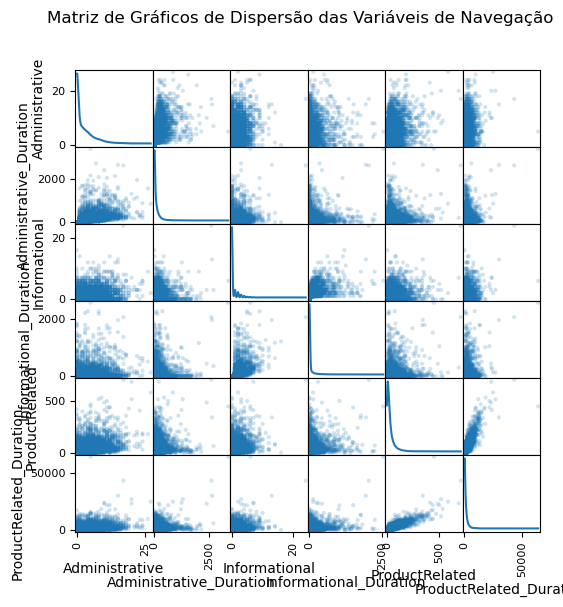

In [10]:
# Carregar o dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Selecionar as variáveis de interesse
variaveis = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration'
]
df_selecionado = df[variaveis]

# Criar a matriz de gráficos de dispersão com tamanho reduzido
scatter_matrix(df_selecionado, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.suptitle('Matriz de Gráficos de Dispersão das Variáveis de Navegação')
plt.show()

#### 5.2 Análise do Gráfico

O gráfico acima apresenta uma matriz de dispersão das variáveis relacionadas aos comportamentos de navegação dos usuários. Cada célula representa a relação entre dois atributos, enquanto a diagonal mostra a distribuição de cada variável individual por meio de uma estimativa de densidade. Observa-se que algumas variáveis, como `ProductRelated` e `ProductRelated_Duration`, possuem uma dispersão mais ampla, indicando maior variabilidade no comportamento dos usuários. Por outro lado, variáveis como `Informational` e `Informational_Duration` apresentam maior concentração de pontos próximos a valores baixos, sugerindo que a maioria dos usuários gasta pouco tempo com conteúdos informativos. Essas informações podem ser úteis para entender os padrões de navegação e segmentar os usuários de forma mais eficiente.


#### 5.3 Explicação do Código

O código abaixo realiza o carregamento do dataset `online_shoppers_intention.csv` e seleciona as variáveis relacionadas aos comportamentos de navegação dos usuários, como `Administrative`, `Informational` e `ProductRelated`, juntamente com suas respectivas durações. Em seguida, utiliza a função `hist` para criar histogramas dessas variáveis. Os histogramas ajudam a visualizar a distribuição de frequência dos dados, identificando padrões como a concentração de valores em determinados intervalos, bem como a presença de assimetrias ou valores atípicos. Essa análise inicial é útil para entender o comportamento dos usuários no site.


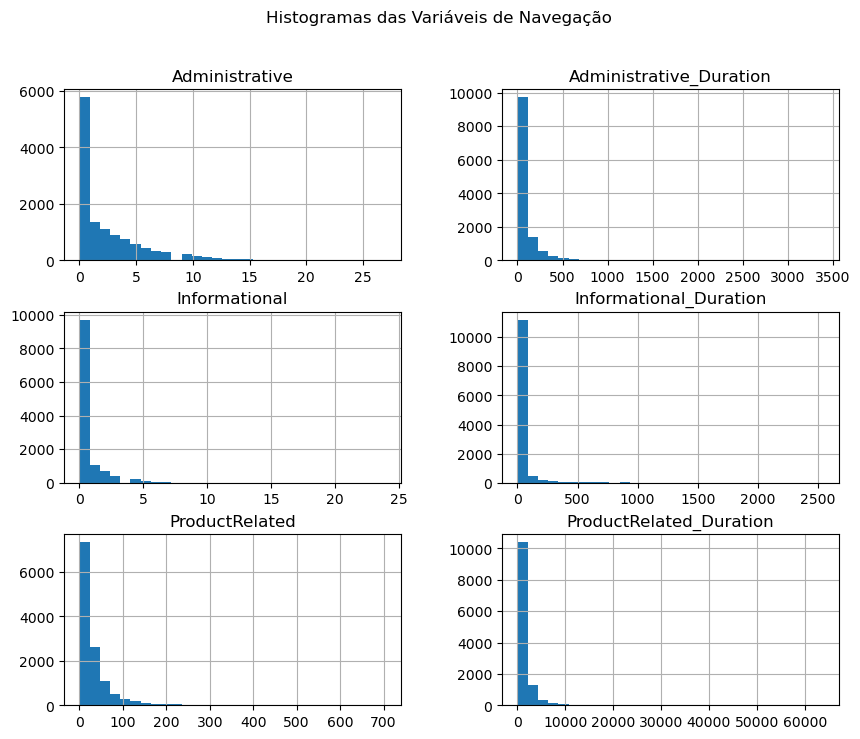

In [13]:
# Carregar o dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Selecionar as variáveis de interesse
variaveis = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration'
]

# Criar histogramas
df[variaveis].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histogramas das Variáveis de Navegação')
plt.show()

#### 5.4 Análise dos Histogramas

Os histogramas acima apresentam a distribuição das variáveis relacionadas aos comportamentos de navegação dos usuários:

- **Administrative e Administrative_Duration:** A maioria dos valores está concentrada nos intervalos mais baixos, indicando que a maioria dos usuários realiza poucas interações administrativas ou passa pouco tempo em páginas administrativas.
  
- **Informational e Informational_Duration:** Assim como as variáveis administrativas, essas variáveis apresentam alta concentração de valores próximos de zero, sugerindo que poucos usuários acessam ou gastam tempo em páginas informativas.

- **ProductRelated e ProductRelated_Duration:** Apesar de também apresentarem uma concentração alta de valores baixos, as distribuições são um pouco mais dispersas em comparação às variáveis anteriores. Isso indica que mais usuários acessam páginas relacionadas a produtos e passam mais tempo nessas páginas, refletindo maior interesse nos produtos oferecidos.

#### 5.5 Observação Geral

Os histogramas destacam que o comportamento predominante dos usuários no site é acessar rapidamente as páginas administrativas e informativas, com maior engajamento nas páginas relacionadas a produtos.

#### 6 Explicação do Código

O código acima cria boxplots para as variáveis relacionadas aos comportamentos de navegação dos usuários presentes no dataset. A função `melt` é usada para reorganizar os dados, facilitando a criação dos boxplots com o eixo `x` representando as variáveis e o eixo `y` exibindo os valores. A rotação dos rótulos no eixo `x` melhora a legibilidade, enquanto o título fornece contexto para o gráfico.

Os boxplots ajudam a identificar a distribuição dos dados, a presença de valores atípicos (outliers), e os valores mínimos, máximos, mediana e quartis de cada variável. Essa análise é essencial para entender a variabilidade e a dispersão dos dados em cada variável.


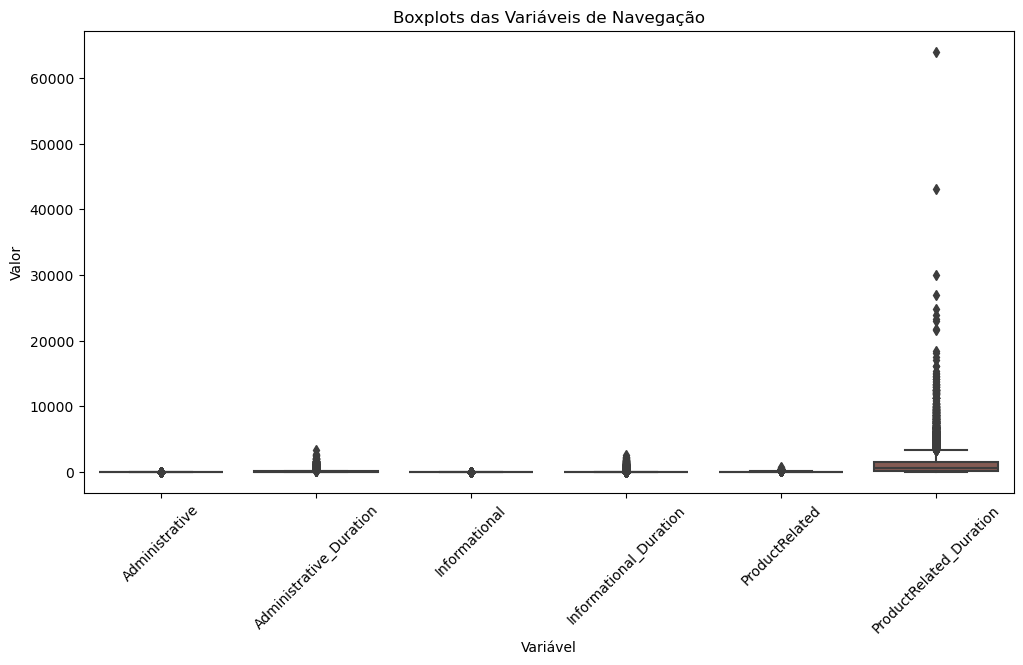

In [14]:
# Criar boxplots
plt.figure(figsize=(12, 6))
df_melted = df[variaveis].melt(var_name='Variável', value_name='Valor')
sns.boxplot(x='Variável', y='Valor', data=df_melted)
plt.xticks(rotation=45)
plt.title('Boxplots das Variáveis de Navegação')
plt.show()

#### 6.1 Análise dos Boxplots

O gráfico acima apresenta os boxplots das variáveis relacionadas aos comportamentos de navegação dos usuários. Cada boxplot fornece informações importantes sobre a distribuição dos dados, como a mediana, os quartis e a presença de valores atípicos (outliers).

#### 6.2 Observações Principais:

- **Administrative e Administrative_Duration:** A maioria dos valores está concentrada em uma faixa baixa, com poucos valores atípicos que indicam sessões em que os usuários passaram mais tempo em atividades administrativas.

- **Informational e Informational_Duration:** Assim como as variáveis administrativas, estas possuem concentrações próximas a zero, indicando que poucos usuários interagem ou gastam tempo em páginas informativas. Também apresentam poucos outliers.

- **ProductRelated e ProductRelated_Duration:** 
  - **ProductRelated:** Embora a maioria dos valores esteja em níveis baixos, apresenta uma maior dispersão em comparação com as outras variáveis, indicando que os usuários interagem com mais frequência com páginas relacionadas a produtos.
  - **ProductRelated_Duration:** Essa variável apresenta a maior dispersão e um número significativo de valores atípicos. Isso sugere que alguns usuários gastam bastante tempo navegando em páginas de produtos, mas a maioria dos usuários gasta pouco tempo.

### 6.3 Conclusão:

Os boxplots mostram que o comportamento predominante dos usuários está concentrado em interações rápidas e com menor duração, especialmente para páginas administrativas e informativas. No entanto, páginas relacionadas a produtos têm maior variabilidade, refletindo um maior engajamento de alguns usuários. Essas informações podem ser úteis para identificar grupos de usuários que apresentam padrões de navegação mais intensos.


### 7 Calcular a matriz de correlação

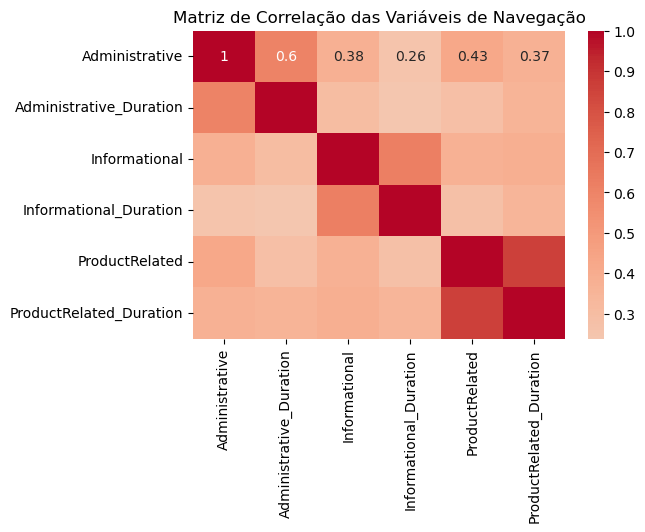

In [24]:
corr_matrix = df[variaveis].corr()

# Criar o heatmap com tamanho menor
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis de Navegação')
plt.show()


### 7.2 Análise da Matriz de Correlação

O heatmap acima apresenta a matriz de correlação entre as variáveis relacionadas aos comportamentos de navegação dos usuários. A correlação é medida pelo coeficiente de Pearson, variando entre -1 (correlação negativa perfeita) e 1 (correlação positiva perfeita). Valores próximos de 0 indicam pouca ou nenhuma correlação.

### 7.3 Observações Principais:

- **Administrative e Administrative_Duration (0.6):** Existe uma correlação moderada entre o número de interações administrativas e a duração total delas. Isso é esperado, pois mais interações tendem a aumentar o tempo gasto.

- **Informational e Informational_Duration (0.43):** A correlação entre o número de interações informativas e a duração também é moderada, indicando que usuários que acessam mais páginas informativas geralmente gastam mais tempo nelas.

- **ProductRelated e ProductRelated_Duration (0.37):** A correlação entre o número de interações relacionadas a produtos e a duração dessas interações é mais baixa em comparação com as variáveis administrativas, sugerindo que o tempo gasto em páginas de produtos varia mais de acordo com o comportamento do usuário.

- **Baixa correlação cruzada entre variáveis diferentes:** As correlações entre as variáveis de diferentes categorias (por exemplo, `Administrative` e `Informational_Duration`) são geralmente baixas, indicando que os diferentes tipos de interações no site estão relativamente isolados em termos de comportamento do usuário.

### 7.4 Conclusão:

Os resultados mostram que, em geral, as variáveis de cada tipo (administrativo, informativo e relacionado a produtos) apresentam correlações moderadas entre frequência de interação e duração, enquanto as interações entre diferentes categorias têm menor relação. Isso reflete que os comportamentos dos usuários tendem a ser segmentados de acordo com o tipo de página acessada.


## 8  Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

# Análise de Segmentação com o Algoritmo K-Means

## 8.1 Aplicação do Algoritmo K-Means

Utilizaremos o algoritmo K-Means para segmentar os dados do dataset `online_shoppers_intention.csv` com diferentes valores de **𝑘** (número de clusters). Para esta análise, consideraremos:

- **𝑘 = 3**
- **𝑘 = 5**

---

## 8.2 Análise Descritiva dos Clusters

Para cada valor de **𝑘**, calcularemos as estatísticas descritivas (média e desvio padrão) das variáveis selecionadas para cada cluster. As variáveis de interesse são:

- `Administrative`
- `Administrative_Duration`
- `Informational`
- `Informational_Duration`
- `ProductRelated`
- `ProductRelated_Duration`

---

## 8.3 Decisão sobre o Agrupamento Final

Com base nas análises descritivas, identificaremos o número de clusters que melhor segmenta os usuários de acordo com seus comportamentos de navegação.

---

## 8.4 Sugestão de Nomes para os Grupos

Atribuiremos nomes aos clusters com base nas características predominantes de cada grupo.


In [19]:
# Carregar o dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Selecionar as variáveis de interesse
variaveis = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration'
]
df_selecionado = df[variaveis]

# Padronizar os dados
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df_selecionado)

# Definir diferentes números de clusters
num_clusters = [3, 5]

# Dicionário para armazenar os resultados
resultados = {}

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_padronizado)
    df[f'Cluster_{k}'] = clusters
    resultados[k] = df.groupby(f'Cluster_{k}')[variaveis].agg(['mean', 'std'])

# Visualizar os resultados
for k in num_clusters:
    print(f'\nAnálise Descritiva para {k} Clusters:')
    display(resultados[k])



Análise Descritiva para 3 Clusters:


Administrative           Administrative_Duration              \
                    mean       std                    mean         std   
Cluster_3                                                                
0               6.554920  3.388445              252.148432  261.954660   
1               0.924445  1.427405               24.873236   48.206851   
2               7.030909  5.161239              267.072347  370.730066   

          Informational           Informational_Duration              \
                   mean       std                   mean         std   
Cluster_3                                                              
0              0.996325  1.318695               43.30954   80.288223   
1              0.159790  0.541598                6.52277   35.615938   
2              4.141818  2.671764              469.30116  437.650486   

          ProductRelated             ProductRelated_Duration               
                    mean         std                    mean          std  
Cluster_3                                                                  
0              56.697428   43.545412             2103.627215  1737.318526  
1              18.901725   19.141233              688.500342   828.827631  
2             138.227273  113.137299             5736.438462  5329.423434


Análise Descritiva para 5 Clusters:


Administrative           Administrative_Duration              \
                    mean       std                    mean         std   
Cluster_5                                                                
0               6.900882  3.049783              280.509657  281.568263   
1               7.405594  5.730125              333.739775  511.896693   
2               4.747826  3.770105              157.375951  181.309158   
3               0.843664  1.303196               22.154264   42.689796   
4               6.759901  5.005136              200.546256  248.153987   

          Informational           Informational_Duration              \
                   mean       std                   mean         std   
Cluster_5                                                              
0              0.442138  0.745112              15.825655   40.478505   
1              4.937063  3.542929            1054.087069  410.933847   
2              3.581366  1.568471             219.116502  163.581814   
3              0.123522  0.417292               4.082291   22.277869   
4              1.608911  1.754263              75.437074  114.508514   

          ProductRelated             ProductRelated_Duration               
                    mean         std                    mean          std  
Cluster_5                                                                  
0              43.051894   30.417182             1554.425200  1191.214717  
1             110.692308  110.202645             5447.913602  7406.334099  
2              50.580124   36.016478             1958.050353  1496.463485  
3              19.243840   20.000080              703.322934   860.742748  
4             191.995050   86.362040             7462.340286  3437.367021

## 8.5 Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [21]:
# Calcular a média de Bounce Rate por cluster
bounce_rate_por_cluster = df.groupby('Cluster_5')['BounceRates'].mean()
print("Média de Bounce Rate por Cluster:")
print(bounce_rate_por_cluster)

# Calcular a proporção de sessões com compra por cluster
revenue_por_cluster = df.groupby('Cluster_5')['Revenue'].mean()
print("\nProporção de Sessões com Compra por Cluster:")
print(revenue_por_cluster)

# Identificar o cluster com maior propensão à compra
cluster_mais_propenso = revenue_por_cluster.idxmax()
print(f"\nO Cluster {cluster_mais_propenso} possui os clientes mais propensos à compra.")


Média de Bounce Rate por Cluster:
Cluster_5
0    0.006438
1    0.007350
2    0.007831
3    0.027815
4    0.005223
Name: BounceRates, dtype: float64

Proporção de Sessões com Compra por Cluster:
Cluster_5
0    0.214323
1    0.293706
2    0.242236
3    0.123633
4    0.344059
Name: Revenue, dtype: float64

O Cluster 4 possui os clientes mais propensos à compra.


# 9 Análise de Métricas por Cluster

## 9.1 Média de Bounce Rate por Cluster

| Cluster | Média de Bounce Rate |
|---------|-----------------------|
| 0       | 0,006438             |
| 1       | 0,007350             |
| 2       | 0,007831             |
| 3       | 0,027815             |
| 4       | 0,005223             |

---

## 9.2 Proporção de Sessões com Compra por Cluster

| Cluster | Proporção de Compras |
|---------|-----------------------|
| 0       | 21,43%               |
| 1       | 29,37%               |
| 2       | 24,22%               |
| 3       | 12,36%               |
| 4       | 34,41%               |

---

## 9.3 Análise

- **Cluster 4** apresenta a menor média de Bounce Rate (**0,005223**) e a maior proporção de sessões com compra (**34,41%**), indicando que os clientes deste grupo são os mais propensos a realizar compras.
- **Cluster 3** possui a maior média de Bounce Rate (**0,027815**) e a menor proporção de compras (**12,36%**), sugerindo menor engajamento e propensão à conversão.

---

## 9.4 Conclusão

O **Cluster 4** representa os clientes mais engajados e com maior probabilidade de realizar compras. Recomenda-se direcionar estratégias de marketing e personalização para este grupo, visando aumentar ainda mais a taxa de conversão.

**Nota:** Para uma análise mais aprofundada, é importante considerar outras variáveis e contextos específicos do negócio.


## 10. Análise de Clustering com o Dataset online_shoppers_intention.csv


In [38]:
import sklearn
print(sklearn.__version__)


1.1.3


In [39]:
km = KMeans(n_clusters=k, n_init=10, random_state=42)


In [40]:
pip install --upgrade scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.5 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

## 10.1 

Este código realiza uma análise de clustering utilizando o dataset `online_shoppers_intention.csv`. 

## 10.2 Etapas do Processo

1. **Seleção de colunas numéricas**:
   - Apenas as colunas numéricas são selecionadas para análise.
   - Valores ausentes são removidos para garantir a integridade dos dados.

2. **Padronização dos dados**:
   - Os dados são padronizados utilizando `StandardScaler`, preparando-os para o algoritmo de clustering `KMeans`.

## 10.3 Objetivo

O objetivo é determinar o número ideal de clusters utilizando dois métodos de avaliação:

1. **Método do Cotovelo**:
   - Baseado na soma dos quadrados intra-clusters (inércia).
   - Identifica o ponto onde a redução da inércia começa a diminuir significativamente.

2. **Coeficiente de Silhueta**:
   - Avalia a qualidade dos clusters formados.
   - Mede a coesão (proximidade dos pontos ao centro do cluster) e a separação (distância entre os clusters).

## 10.4 Processo de Avaliação

- Para cada valor de `k` entre 2 e 14:
  - O algoritmo `KMeans` é treinado.
  - As métricas correspondentes (inércia e coeficiente de silhueta) são calculadas.

## 10.5 Visualizações

1. **Gráfico do Método do Cotovelo**:
   - Exibe a inércia em função do número de clusters (`k`).
   - O "cotovelo" no gráfico indica o número ideal de clusters.

2. **Gráfico do Coeficiente de Silhueta**:
   - Reflete a coesão e separação dos clusters formados.
   - Valores mais altos indicam melhor qualidade dos clusters.

## 10.6 Resultados Esperados

Os gráficos gerados auxiliam na escolha do número de clusters ideal para o dataset, permitindo uma análise mais eficaz dos dados agrupados.


Colunas do dataset: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


100%|██████████| 13/13 [00:18<00:00,  1.40s/it]


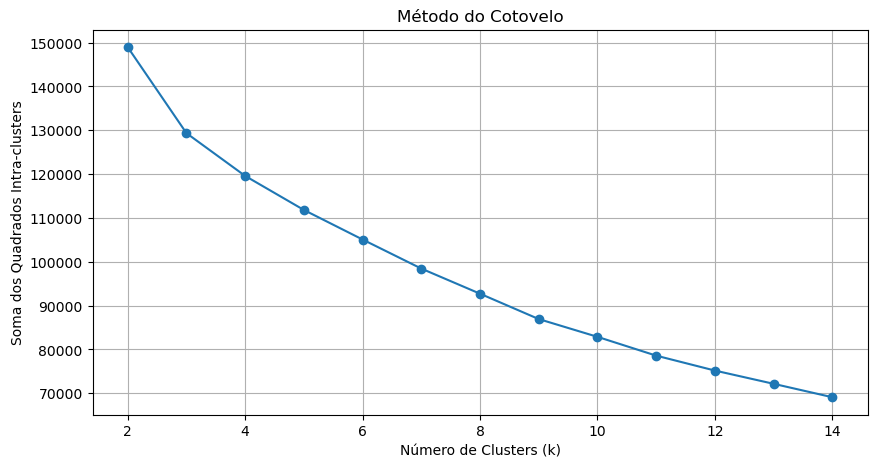

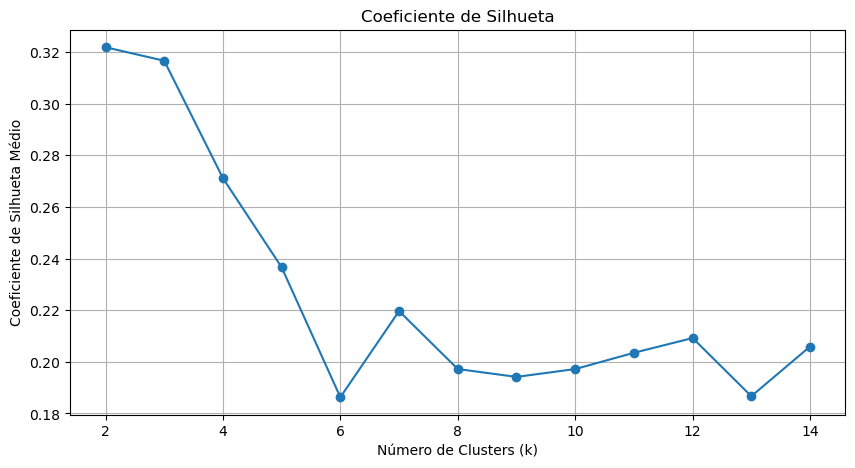

In [6]:
# Carregando o dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Verificando as colunas do dataset
print("Colunas do dataset:", df.columns)

# Selecionar apenas colunas numéricas relevantes (exclua strings ou categóricas)
colunas_relevantes = df.select_dtypes(include=['float64', 'int64']).columns
df_numerico = df[colunas_relevantes]

# Verifique se há valores ausentes e trate-os
df_numerico = df_numerico.dropna()  # Remove linhas com valores ausentes

# Padronizar os dados
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df_numerico)

# Valores de K para testar
K = range(2, 15)

# Método do Cotovelo e Silhueta
SQD = []  # Soma dos quadrados intra-clusters (inertia)
silhouette_scores = []  # Coeficiente de silhueta

for k in tqdm(K):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df_padronizado)
    SQD.append(km.inertia_)
    
    # Coeficiente de silhueta
    labels = km.labels_
    silhouette_avg = silhouette_score(df_padronizado, labels)
    silhouette_scores.append(silhouette_avg)

# Gráfico do Cotovelo
plt.figure(figsize=(10, 5))
plt.plot(K, SQD, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados Intra-clusters')
plt.grid(True)
plt.show()

# Gráfico do Coeficiente de Silhueta
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhueta Médio')
plt.grid(True)
plt.show()
